# 초기 인공지능 알고리즘과 로지스틱 회귀

- 이진분류는 True/ False 로 구분하는 문제
- 퍼셉트론(Perceptron) : 1957년 프랑크 로젠블라트가 발표. 여깃에서 다층 퍼센트론 이름이 유래되었다.

## Preparing Data Set

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


- Length : 569
- Property : 30
- Target : 1-Dimensional

In [3]:
cancer.data[:3] 

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

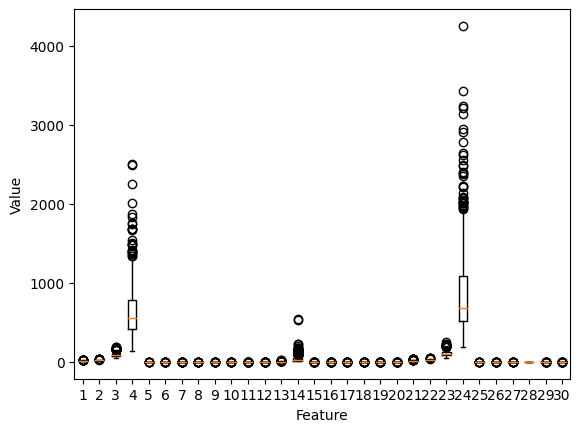

In [7]:
plt.boxplot(cancer.data)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

- 대부분의 값들이 0에 가까이 있는 것을 볼 수 있다..?
- 2사분위 : 중간값(50)
- 1사분위 : 25%의 값 범위
- 3사분위 : 75%의 값 범위

In [11]:
np.unique(cancer.target, return_counts =True)
#array에 0, 1 처럼 2진 분류인지 확인
# 'return_counts'를 True로 주면 각각 몇개인지 Count해주기 때문에 쓴 듯

(array([0, 1]), array([212, 357], dtype=int64))

- imbalanced data라고 볼 수 있기는 하다.

In [12]:
X = cancer.data
y = cancer.target

# 훈련 세트와 테스트 세트 나누기

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size=0.2, random_state=42)

- 양성 클래스와 음성 클래스 비율을 동일하게 만들기 위함.
- 비율 조정을 수행하는듯.

## 분할 결과 확인

In [16]:
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [17]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

# 로지스틴 뉴런 구현하기

- 일반 뉴런

In [22]:
class LogisticNeuron:
    def __init__(self):
        self.w=None
        self.b=None
        #특성이 30개 이기때문에, 따로 초기화 안하는게 나을 수 있음...(노가다 ㅋ)
    def forpass(self,x):
        z=np.sum(x*self.w) + self.b #직선방정식을 계산.
        return z
    def backprop(self,x,err):
        w_grad = x*err # 가중치에 대한 그레이디언트를 계산한다.
        b_grad = 1*err # 절편에 대한 그레이디언트를 계산한다.
        return w_grad, b_grad
    def fit(self,X,y,epochs=100):
        self.w=np.ones(X.shape[1])
        self.b=0
        for i in range(epochs):
            for x_i,y_i in zip(X,y):
                z=self.forpass(x_i)
                a=self.activation(z)
                err = -(y_i-a)
                w_grad, b_grad = self.backprop(x_i,err)
                self.w -= w_grad
                self.b -= b_grad
                
                a = np.clip(a,1e-10,1-1e-10)
                loss+=()
    def activation(self,z):
        a= 1/(1+np.exp(-z)) # 시그모이드
        return a
    def predict(self, X):
        z = [self.forpass(x_i) for x_i in X]
        a = self.activation(np.array(z)) # 활성화 함수 적용.
        return a > 0.5 # 계단 함수이기 때문.

In [23]:
neuron = LogisticNeuron()
neuron.fit(X_train, y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_13004\2515698385.py:25: RuntimeWarning: overflow encountered in exp
  a= 1/(1+np.exp(-z)) # 시그모이드


In [24]:
np.mean(neuron.predict(X_test)==y_test)

C:\Users\user\AppData\Local\Temp\ipykernel_13004\2515698385.py:25: RuntimeWarning: overflow encountered in exp
  a= 1/(1+np.exp(-z)) # 시그모이드


0.8245614035087719

## Permutation 을 활용함
- 에포크마다 훈련 샘플 섞기

In [36]:
 class SingleLayer:
    def __init__(self):
        self.w=None
        self.b=None
        #특성이 30개 이기때문에, 따로 초기화 안하는게 나을 수 있음...(노가다 ㅋ)
        
        #손실함수 결괏값 저장 기능.
        self.losses = []
        
    def forpass(self,X):
        z=np.sum(X*self.w) + self.b #직선방정식을 계산.
        return z
    def backprop(self,X,err):
        w_grad = X*err # 가중치에 대한 그레이디언트를 계산한다.
        b_grad = 1*err # 절편에 대한 그레이디언트를 계산한다.
        return w_grad, b_grad
    def fit(self,X,y,epochs=100):
        self.w=np.ones(X.shape[1])
        self.b=0
        for i in range(epochs):
            
            loss = 0
            indexes = np.random.permutation(np.arange(len(X))) # 인덱스를 섞는다.
            
            #Epoch 마다 샘플을 
            for i in indexes:
                z=self.forpass(X[i]) #정방향 계산
                a=self.activation(z) # 활성화 함수 적용.
                err = -(y[i]-a) # 오차 계산
                w_grad, b_grad = self.backprop(X[i],err) # 역방향 계산
                self.w -= w_grad
                self.b -= b_grad
                
                a = np.clip(a,1e-10,1-1e-10)
                loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))
            
    def activation(self,z):
        a= 1/(1+np.exp(-z)) # 시그모이드
        return a
    def predict(self, X):
        z = [self.forpass(x_i) for x_i in X]
        return np.array(z) > 0
    
        # 아래의 활성화 함수는 뺐는데, 굳이 필요 없기 때문?
        # Sigmoid 함수의 특성을 알고 있기 때문에 굳이 계산할 필요가 없기때문이긴 함.
        # True/ False 인지만 알면 되기 때문.
        
        # a = self.activation(np.array(z)) # 활성화 함수 적용.
        # return a > 0.5 # 계단 함수이기 때문.
    def score(self, X,y):
        return np.mean(self.predict(X)==y)

In [37]:
layer = SingleLayer()
layer.fit(X_train, y_train)
layer.score(X_test, y_test)

C:\Users\user\AppData\Local\Temp\ipykernel_13004\1784078779.py:39: RuntimeWarning: overflow encountered in exp
  a= 1/(1+np.exp(-z)) # 시그모이드


0.9473684210526315

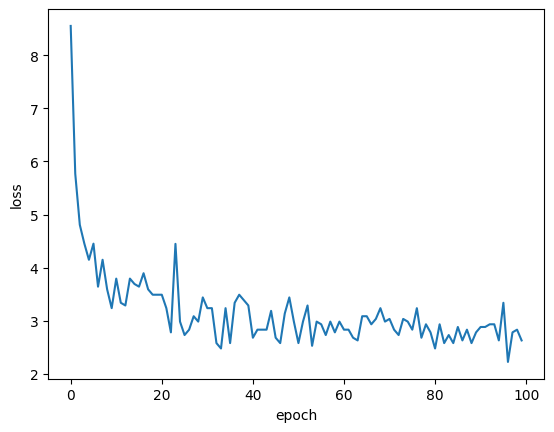

In [38]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# sklearn으로 로지스틱 회귀를 수행하는 법.

## SGDClassifier : Stochastic Gradient Descent
- SVM 이나 Logistic을 이용하는 방법이다.

In [41]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter = 100, tol=1e-3, random_state=42)

In [42]:
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8333333333333334

- 다른 Method에 비해 좋지는 않으므로 조정이 필요할듯.. iteration등등

In [43]:
sgd.predict(X_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])